In [1]:
# This notebook explores the results for the agent based model

In [2]:
import re
import glob
import json
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option( 'display.max_columns', None )
pd.set_option( 'display.max_rows', None )

# Loading localidades GeoJSON for reference

In [ ]:
localidades = gpd.read_file( './data/geo/bogotá/localidades_no_sumapaz.json' )

In [ ]:
del localidades[ 'geometry' ]

In [ ]:
localidades.head()

In [ ]:
locs = {}
for i, row in localidades.iterrows():
    locs[ str( row[ 'codigo_localidad' ] ) ] = row[ 'localidad' ]
locs

# Loading ABM results

In [4]:
city = 'barranquilla'
init_date = pd.to_datetime( '03/06/2020' )

In [5]:
path = './data/agents/{}/*.csv'.format( city )

In [6]:
files = glob.glob( path )

In [7]:
agents = []
exp = 0

for file in files:
    df = pd.read_csv( file )
    df[ 'Fecha' ] = df[ 'Día' ].apply( lambda x: init_date + pd.DateOffset( days = x ) )
    df[ 'exp' ] = exp
    agents.append( df )
    exp = exp + 1

agents = pd.concat( agents )
del agents[ 'Unnamed: 0' ]

In [8]:
agents.shape

(6400, 41)

In [9]:
agents.dtypes

Susceptibles                                   int64
Total infectados                               int64
Graves                                         int64
Críticos                                       int64
Leves                                          int64
Recuperados                                    int64
Rt                                           float64
Recuento_zonas                                object
0-9                                           object
10-19                                         object
20-39                                         object
40-59                                         object
>60                                           object
En_cuarentena                                 object
Restringido_movilidad                         object
Vivos                                          int64
Día                                            int64
Contactos_prom_trabajo                       float64
Contactos_prom_transporte                    f

In [10]:
agents.tail()

,Susceptibles,Total infectados,Graves,Críticos,Leves,Recuperados,Rt,Recuento_zonas,0-9,10-19,20-39,40-59,>60,En_cuarentena,Restringido_movilidad,Vivos,Día,Contactos_prom_trabajo,Contactos_prom_transporte,Contactos_prom_casa,Contactos_prom_trabajo_conm,Contactos_prom_transporte_conm,Contactos_prom_casa_conm,Nuevos_infectados,Detectados,En_testing,En_cama,En_UCI,Detectados_por_intervencion,#Intervenidos,porcentaje_edad_activa_por_zona,porcentaje_edad_activa,tasa_letalidad_por_zona,tasa_letalidad,total_muertos,total_muertos_por_zona,total_muertos_edad_activa,total_muertos_edad_activa_por_zona,zonas intervenidas,Fecha,exp
195,31767,85,7,1,77,42388,0.282353,"{'CENTRO_HISTORICO': [3670, 0, 0, 31, 2, 0, 3,...","[10458, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 174, ...","[10647, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1321,...","[2824, 0, 0, 31, 2, 0, 3, 0, 3, 0, 0, 0, 20899...","[2260, 0, 0, 36, 3, 0, 2, 0, 2, 1, 0, 1, 14937...","[5578, 0, 0, 9, 0, 0, 2, 0, 2, 0, 0, 0, 5057, ...","[27205, 20, 1, 0, 10164]","[0, 0, 0, 0, 0]",74240,195,4.396323,2.625929,1.457260,8.857069,5.290339,2.935875,5,765,0,152,20,0,0,"{'CENTRO_HISTORICO': 0.006241418050181001, 'SU...",0.006882,"{'CENTRO_HISTORICO': 0.0, 'SUR_ORIENTE': 0.032...",0.014175,11,"{'CENTRO_HISTORICO': 0, 'SUR_ORIENTE': 6, 'MET...",1,"{'CENTRO_HISTORICO': 0, 'SUR_ORIENTE': 1, 'MET...",{},2020-09-17,31
196,31765,78,7,1,70,42397,0.294872,"{'CENTRO_HISTORICO': [3669, 0, 0, 28, 2, 0, 3,...","[10458, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 174, ...","[10647, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1322,...","[2823, 0, 0, 27, 2, 0, 3, 0, 3, 0, 0, 0, 20904...","[2260, 0, 0, 34, 1, 0, 2, 0, 2, 1, 0, 1, 14939...","[5577, 0, 0, 9, 0, 0, 2, 0, 2, 0, 0, 0, 5058, ...","[27180, 11, 1, 0, 9986]","[0, 0, 0, 0, 0]",74240,196,4.434186,2.660089,1.467497,8.882251,5.328504,2.939588,3,765,0,152,20,0,0,"{'CENTRO_HISTORICO': 0.006241418050181001, 'SU...",0.006882,"{'CENTRO_HISTORICO': 0.0, 'SUR_ORIENTE': 0.032...",0.014175,11,"{'CENTRO_HISTORICO': 0, 'SUR_ORIENTE': 6, 'MET...",1,"{'CENTRO_HISTORICO': 0, 'SUR_ORIENTE': 1, 'MET...",{},2020-09-18,31
197,31762,72,7,1,64,42406,0.277778,"{'CENTRO_HISTORICO': [3668, 0, 0, 25, 1, 0, 3,...","[10458, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 174, ...","[10646, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1322,...","[2821, 0, 0, 24, 2, 0, 3, 0, 3, 0, 0, 0, 20909...","[2260, 0, 0, 33, 0, 0, 2, 0, 2, 1, 0, 1, 14940...","[5577, 0, 0, 6, 1, 0, 2, 0, 2, 0, 0, 0, 5061, ...","[27300, 14, 2, 0, 10919]","[0, 0, 0, 0, 0]",74240,197,4.199003,2.532112,1.408028,8.658075,5.221053,2.903263,4,765,0,152,20,0,0,"{'CENTRO_HISTORICO': 0.006241418050181001, 'SU...",0.006882,"{'CENTRO_HISTORICO': 0.0, 'SUR_ORIENTE': 0.032...",0.014175,11,"{'CENTRO_HISTORICO': 0, 'SUR_ORIENTE': 6, 'MET...",1,"{'CENTRO_HISTORICO': 0, 'SUR_ORIENTE': 1, 'MET...",{},2020-09-19,31
198,31760,66,7,1,58,42414,0.242424,"{'CENTRO_HISTORICO': [3668, 0, 0, 22, 0, 0, 3,...","[10458, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 174, ...","[10646, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1322,...","[2821, 0, 0, 19, 0, 0, 3, 0, 3, 0, 0, 0, 20914...","[2258, 0, 0, 32, 0, 0, 2, 0, 2, 1, 0, 1, 14943...","[5577, 0, 0, 6, 0, 0, 2, 0, 2, 0, 0, 0, 5061, ...","[27635, 19, 1, 0, 13548]","[0, 0, 0, 0, 0]",74240,198,3.549582,2.126738,1.217147,7.976541,4.779157,2.735145,0,765,0,152,20,0,0,"{'CENTRO_HISTORICO': 0.006241418050181001, 'SU...",0.006882,"{'CENTRO_HISTORICO': 0.0, 'SUR_ORIENTE': 0.032...",0.014175,11,"{'CENTRO_HISTORICO': 0, 'SUR_ORIENTE': 6, 'MET...",1,"{'CENTRO_HISTORICO': 0, 'SUR_ORIENTE': 1, 'MET...",{},2020-09-20,31
199,31759,60,6,1,53,42421,0.266667,"{'CENTRO_HISTORICO': [3668, 0, 0, 19, 0, 0, 2,...","[10458, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 174, ...","[10646, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1322,...","[2820, 0, 0, 16, 1, 0, 1, 0, 1, 0, 0, 0, 20920...","[2258, 0, 0, 31, 2, 0, 2, 0, 2, 1, 0, 1, 14944...","[5577, 0, 0, 5, 0, 0, 3, 0, 2, 0, 0, 0, 5061, ...","[27084, 13, 2, 0, 9728]","[0, 0, 0, 0, 0]",74240,199,4.538901,2.702478,1.490383,9.006709,5.362628,2.957421,3,765,1,152,20,0,0,"{'CENTRO

In [11]:
def sum_quarantine( x ):
    x = json.loads( x )
    people_in_q = x[ 0 ] + x[ 1 ] + x[ 2 ] + x[ 3 ] + x[ 4 ]
    return people_in_q

In [12]:
agents_norm = []

for exp in agents[ 'exp' ].unique():
    df = agents.loc[ agents[ 'exp' ] == exp ]
    total_people = df[ 'Vivos' ].values[ 0 ]
    df[ 'Graves' ] = df[ 'Graves' ] / total_people
    df[ 'Críticos' ] = df[ 'Críticos' ] / total_people
    df[ 'Fallecidos' ] = ( total_people - df[ 'Vivos' ] ) / total_people
    df[ 'R0' ] = ( df[ 'Nuevos_infectados' ].cumsum() / total_people )
    df[ 'Cuarentena' ] = df[ 'En_cuarentena' ].apply( lambda x: sum_quarantine( x ) ) / total_people
    agents_norm.append( df[ [ 'exp', 'Fecha', 'Graves', 'Críticos', 'Fallecidos', 'R0', 'Rt', 'Cuarentena' ] ] )

agents_norm = pd.concat( agents_norm )

/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [13]:
agents_norm.tail()

,exp,Fecha,Graves,Críticos,Fallecidos,R0,Rt,Cuarentena
195,31,2020-09-17,0.000094,0.000013,0.000148,0.571076,0.282353,0.503562
196,31,2020-09-18,0.000094,0.000013,0.000148,0.571117,0.294872,0.500707
197,31,2020-09-19,0.000094,0.000013,0.000148,0.571171,0.277778,0.514943
198,31,2020-09-20,0.000094,0.000013,0.000148,0.571171,0.242424,0.554915
199,31,2020-09-21,0.000081,0.000013,0.000148,0.571211,0.266667,0.495980


In [14]:
def ci( x ):
    try:
        return 1.96 * np.std( x ) / np.sqrt( len( x ) )
    except ZeroDivisionError:
        return 0

agents_norm_grouped = agents_norm.groupby( 'Fecha' ).agg( { 'Graves': [ 'mean', ci ], 'Críticos': [ 'mean', ci ], 'Fallecidos': [ 'mean', ci ], 'R0': [ 'mean', ci ], 'Rt': [ 'mean', ci ], 'Cuarentena': [ 'mean' ] } )
agents_norm_grouped.columns = [ '_'.join( col ).strip() for col in agents_norm_grouped.columns.values ]

In [15]:
agents_norm_grouped.tail()

,Graves_mean,Graves_ci,Críticos_mean,Críticos_ci,Fallecidos_mean,Fallecidos_ci,R0_mean,R0_ci,Rt_mean,Rt_ci,Cuarentena_mean
Fecha,,,,,,,,,,,
2020-09-17,0.000075,0.000011,0.000011,0.000004,0.000199,0.000019,0.570704,0.000855,0.244926,0.016530,0.501795
2020-09-18,0.000075,0.000011,0.000011,0.000004,0.000199,0.000019,0.570759,0.000852,0.241239,0.015521,0.499453
2020-09-19,0.000069,0.000010,0.000011,0.000004,0.000199,0.000019,0.570822,0.000848,0.227336,0.018822,0.515568
2020-09-20,0.000064,0.000010,0.000010,0.000004,0.000199,0.000019,0.570867,0.000847,0.227849,0.018266,0.554695
2020-09-21,0.000059,0.000011,0.000009,0.000004,0.000199,0.000019,0.570914,0.000847,0.232080,0.018316,0.494777


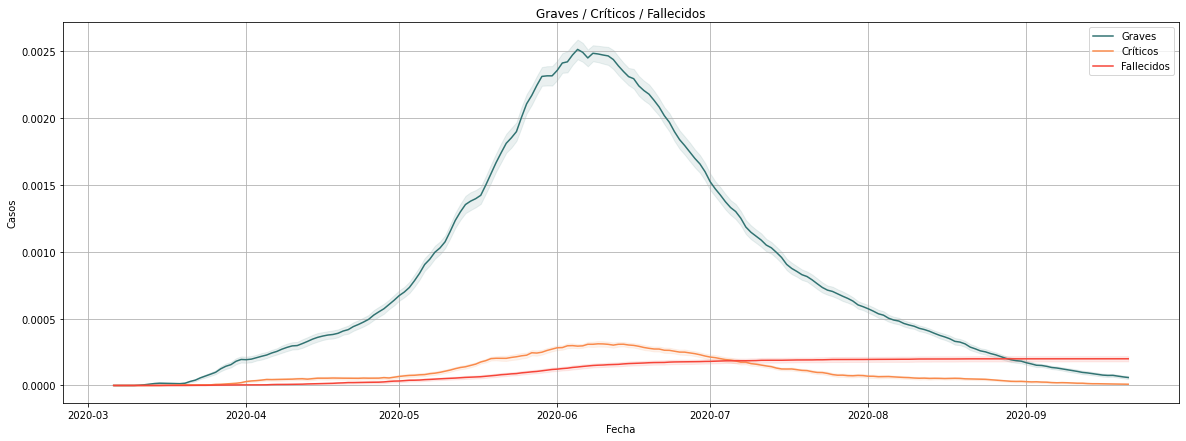

In [16]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( agents_norm_grouped.index, agents_norm_grouped[ 'Graves_mean' ], label = 'Graves', color = '#317372' )
ax.fill_between( agents_norm_grouped.index, ( agents_norm_grouped[ 'Graves_mean' ] - agents_norm_grouped[ 'Graves_ci' ] ), ( agents_norm_grouped[ 'Graves_mean' ] + agents_norm_grouped[ 'Graves_ci' ] ), color = '#317372', alpha = .1 )

ax.plot( agents_norm_grouped.index, agents_norm_grouped[ 'Críticos_mean' ], label = 'Críticos', color = '#f98a4b' )
ax.fill_between( agents_norm_grouped.index, ( agents_norm_grouped[ 'Críticos_mean' ] - agents_norm_grouped[ 'Críticos_ci' ] ), ( agents_norm_grouped[ 'Críticos_mean' ] + agents_norm_grouped[ 'Críticos_ci' ] ), color = '#f98a4b', alpha = .1 )

ax.plot( agents_norm_grouped.index, agents_norm_grouped[ 'Fallecidos_mean' ], label = 'Fallecidos', color = '#f64438' )
ax.fill_between( agents_norm_grouped.index, ( agents_norm_grouped[ 'Fallecidos_mean' ] - agents_norm_grouped[ 'Fallecidos_ci' ] ), ( agents_norm_grouped[ 'Fallecidos_mean' ] + agents_norm_grouped[ 'Fallecidos_ci' ] ), color = '#f64438', alpha = .1 )

plt.title( 'Graves / Críticos / Fallecidos' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Casos' )
plt.grid( True )
plt.legend()

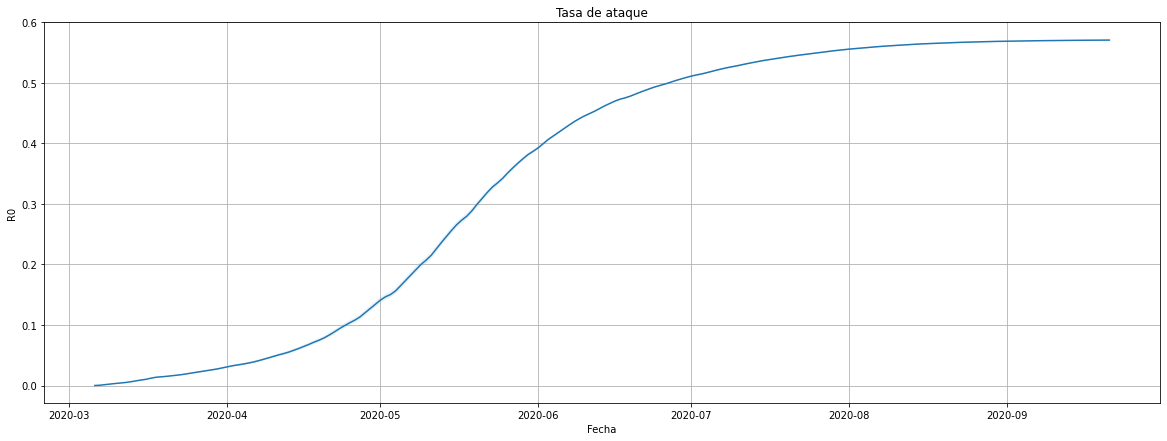

In [17]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( agents_norm_grouped.index, agents_norm_grouped[ 'R0_mean' ] )
ax.fill_between( agents_norm_grouped.index, ( agents_norm_grouped[ 'R0_mean' ] - agents_norm_grouped[ 'R0_ci' ] ), ( agents_norm_grouped[ 'R0_mean' ] + agents_norm_grouped[ 'R0_ci' ] ), alpha = .1 )

plt.title( 'Tasa de ataque' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'R0' )
plt.grid( True )

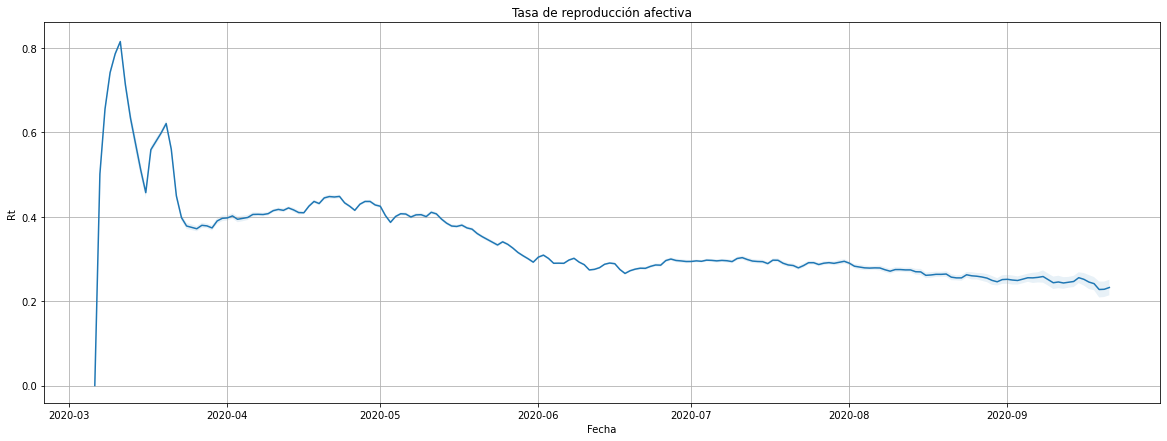

In [18]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( agents_norm_grouped.index, agents_norm_grouped[ 'Rt_mean' ] )
ax.fill_between( agents_norm_grouped.index, ( agents_norm_grouped[ 'Rt_mean' ] - agents_norm_grouped[ 'Rt_ci' ] ), ( agents_norm_grouped[ 'Rt_mean' ] + agents_norm_grouped[ 'Rt_ci' ] ), alpha = .1 )

plt.title( 'Tasa de reproducción afectiva' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Rt' )
plt.grid( True )

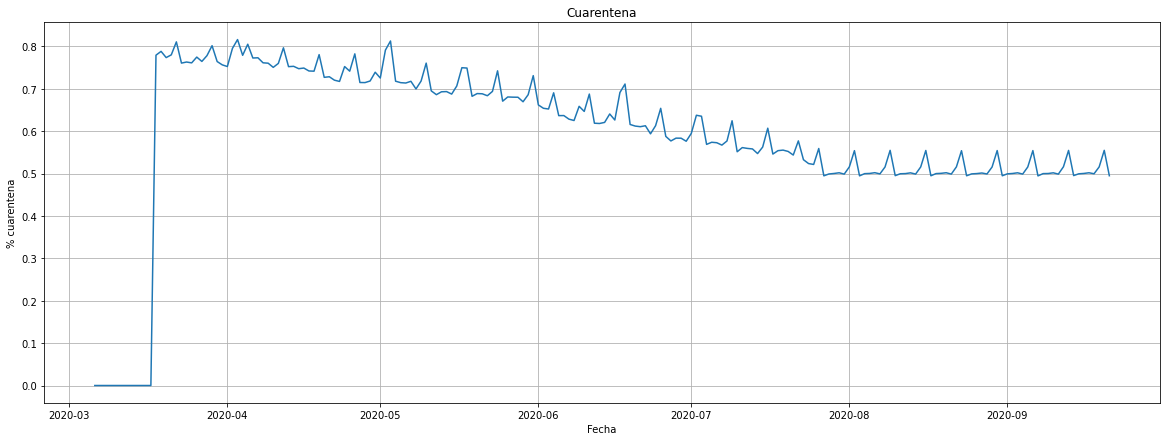

In [19]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( agents_norm_grouped.index, agents_norm_grouped[ 'Cuarentena_mean' ] )

plt.title( 'Cuarentena' )
plt.xlabel( 'Fecha' )
plt.ylabel( '% cuarentena' )
plt.grid( True )

In [20]:
agents_norm.tail()

,exp,Fecha,Graves,Críticos,Fallecidos,R0,Rt,Cuarentena
195,31,2020-09-17,0.000094,0.000013,0.000148,0.571076,0.282353,0.503562
196,31,2020-09-18,0.000094,0.000013,0.000148,0.571117,0.294872,0.500707
197,31,2020-09-19,0.000094,0.000013,0.000148,0.571171,0.277778,0.514943
198,31,2020-09-20,0.000094,0.000013,0.000148,0.571171,0.242424,0.554915
199,31,2020-09-21,0.000081,0.000013,0.000148,0.571211,0.266667,0.495980


In [21]:
agents_norm[ [ 'exp', 'Fecha', 'R0', 'Rt', 'Cuarentena' ] ].to_csv( './agents-viz/data/{}-agents-multi.csv'.format( city ), index = False )

In [22]:
pd.melt( agents_norm[ [ 'exp', 'Fecha', 'Graves', 'Críticos', 'Fallecidos' ] ], id_vars = [ 'Fecha' ], value_vars =[ 'Graves', 'Críticos', 'Fallecidos' ] ).to_csv( './agents-viz/data/{}-agents2-multi.csv'.format( city ), index = False )

# By localidades

In [23]:
recuento_zonas = { 0: 'Susceptibles', 1: '?_1', 2: '?_2', 3: 'Leves', 4: '?_4', 5: '?_5', 6: 'Graves', 7: '?_7', 8: '?_8', 9: 'Críticos', 10: '?_10', 11: '?_11', 12: 'Recuperados', 13: '?_13', 14: '?_14'  }

In [24]:
def expand_by_loc( x ):
    
    replacer = re.compile("(\d+)")
    x[ 'Recuento_zonas' ] = replacer.sub( r'"\1"', x[ 'Recuento_zonas' ] )
    if city in [ 'cartagena', 'barranquilla' ]:
        x[ 'Recuento_zonas' ] = x[ 'Recuento_zonas' ].replace( "'", '"' )
    #print( x[ 'Recuento_zonas' ] )
    
    x[ 'Recuento_zonas' ] = json.loads( x[ 'Recuento_zonas' ] )
    ds = []
    for z in x[ 'Recuento_zonas' ].keys():
        d = dict()
        d[ 'exp' ] = row[ 'exp' ]
        if city == 'bogota':
            d[ 'Localidad' ] = locs[ z ]
        else:
            d[ 'Localidad' ] = z
        d[ 'Día' ] = row[ 'Día' ]
        d[ 'Fecha' ] = init_date + pd.DateOffset( days = d[ 'Día' ] )
        for i in recuento_zonas.keys():
            d[ recuento_zonas[ i ] ] = int( x[ 'Recuento_zonas' ][ z ][ i ] )
        ds.append( d )
    
    return ds

agents_locs = []
for i, row in agents.iterrows():
    agents_locs = agents_locs + expand_by_loc( row )

agents_locs = pd.DataFrame( agents_locs )

In [25]:
agents_locs_norm = []

for exp in agents_locs[ 'exp' ].unique():
    for loc in agents_locs[ 'Localidad' ].unique():
        df = agents_locs.loc[ ( agents_locs[ 'exp' ] == exp ) & ( agents_locs[ 'Localidad' ] == loc ) ]
        total_people = ( df[ 'Susceptibles' ] + df[ 'Leves' ] + df[ 'Graves' ] + df[ 'Críticos' ] + df[ 'Recuperados' ] ).values[ 0 ]

        df[ 'Fallecidos' ] = ( total_people - ( df[ 'Susceptibles' ] + df[ 'Leves' ] + df[ 'Graves' ] + df[ 'Críticos' ] + df[ 'Recuperados' ] ) ) / total_people
        df[ 'Graves' ] = df[ 'Graves' ] / total_people
        df[ 'Críticos' ] = df[ 'Críticos' ] / total_people
        df[ 'R0' ] = ( df[ '?_4' ].cumsum() / total_people )
        agents_locs_norm.append( df[ [ 'exp', 'Fecha', 'Localidad', 'Graves', 'Críticos', 'Fallecidos', 'R0' ] ] )

agents_locs_norm = pd.concat( agents_locs_norm )

/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [38]:
agents_locs_norm[ 'Localidad' ] = agents_locs_norm[ 'Localidad' ].str.replace( '_', ' ' )

In [39]:
agents_locs_norm.tail()

,exp,Fecha,Localidad,Graves,Críticos,Fallecidos,R0
31977,31,2020-09-17,SUR ORIENTE,0.00006,0.0,0.000361,0.599337
31982,31,2020-09-18,SUR ORIENTE,0.00006,0.0,0.000361,0.599337
31987,31,2020-09-19,SUR ORIENTE,0.00006,0.0,0.000361,0.599458
31992,31,2020-09-20,SUR ORIENTE,0.00006,0.0,0.000361,0.599458
31997,31,2020-09-21,SUR ORIENTE,0.00006,0.0,0.000361,0.599458


In [40]:
agents_locs_norm[ [ 'exp', 'Fecha', 'Localidad', 'R0' ] ].to_csv( './agents-viz/data/{}-agents-locs-multi.csv'.format( city ), index = False )

In [41]:
pd.melt( agents_locs_norm[ [ 'exp', 'Fecha', 'Localidad', 'Graves', 'Críticos', 'Fallecidos' ] ], id_vars = [ 'Fecha', 'Localidad' ], value_vars =[ 'Graves', 'Críticos', 'Fallecidos' ] ).to_csv( './agents-viz/data/{}-agents2-locs-multi.csv'.format( city ), index = False )


# By age groups

In [31]:
grupo_edad = { 0: 'Susceptibles', 1: '?_1', 2: '?_2', 3: 'Leves', 4: '?_4', 5: '?_5', 6: 'Graves', 7: '?_7', 8: '?_8', 9: 'Críticos', 10: '?_10', 11: '?_11', 12: 'Recuperados', 13: '?_13', 14: '?_14'  }

In [32]:
age_ranges = {
    'barranquilla': [ '0-9', '10-19', '20-39', '40-59', '>60' ],
    'bogota': [ '0-9', '10-19', '20-39', '40-59', '>60' ],
    'cartagena': [ '0-9', '10-19', '20-39', '40-59', '>60' ]
}

In [33]:
def expand_by_age( x ):
    ds = []
    for a in age_ranges[ city ]:
        x[ a ] = json.loads( x[ a ] )
        d = dict()
        d[ 'exp' ] = row[ 'exp' ]
        d[ 'Grupo de edad' ] = a
        d[ 'Día' ] = row[ 'Día' ]
        d[ 'Fecha' ] = init_date + pd.DateOffset( days = d[ 'Día' ] )
        for i in range( 15 ):
            d[ grupo_edad[ i ] ] = x[ a ][ i ]
        ds.append( d )
    return ds

agents_ages = []
for i, row in agents.iterrows():
    agents_ages = agents_ages + expand_by_age( row )

agents_ages = pd.DataFrame( agents_ages )

In [34]:
agents_ages_norm = []

for exp in agents_ages[ 'exp' ].unique():
    for age in agents_ages[ 'Grupo de edad' ].unique():
        df = agents_ages.loc[ ( agents_ages[ 'exp' ] == exp ) & ( agents_ages[ 'Grupo de edad' ] == age ) ]
        total_people = ( df[ 'Susceptibles' ] + df[ 'Leves' ] + df[ 'Graves' ] + df[ 'Críticos' ] + df[ 'Recuperados' ] ).values[ 0 ]

        df[ 'Fallecidos' ] = ( total_people - ( df[ 'Susceptibles' ] + df[ 'Leves' ] + df[ 'Graves' ] + df[ 'Críticos' ] + df[ 'Recuperados' ] ) ) / total_people
        df[ 'Graves' ] = df[ 'Graves' ] / total_people
        df[ 'Críticos' ] = df[ 'Críticos' ] / total_people
        agents_ages_norm.append( df[ [ 'exp', 'Fecha', 'Grupo de edad', 'Graves', 'Críticos', 'Fallecidos' ] ] )

agents_ages_norm = pd.concat( agents_ages_norm )

/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [35]:
agents_ages_norm.tail()

,exp,Fecha,Grupo de edad,Graves,Críticos,Fallecidos
31979,31,2020-09-17,>60,0.000188,0.0,0.000938
31984,31,2020-09-18,>60,0.000188,0.0,0.000938
31989,31,2020-09-19,>60,0.000188,0.0,0.000938
31994,31,2020-09-20,>60,0.000188,0.0,0.000938
31999,31,2020-09-21,>60,0.000282,0.0,0.000938


In [36]:
pd.melt( agents_ages_norm[ [ 'exp', 'Fecha', 'Grupo de edad', 'Graves', 'Críticos', 'Fallecidos' ] ], id_vars = [ 'Fecha', 'Grupo de edad' ], value_vars =[ 'Graves', 'Críticos', 'Fallecidos' ] ).to_csv( './agents-viz/data/{}-agents2-ages-multi.csv'.format( city ), index = False )
